In [ ]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 1, 1)
yf.pdr_override()

In [ ]:
ticker = "SIVBQ"
df = pdr.get_data_yahoo(ticker, start, end)
#df = pdr.get_data_yahoo("TSLA", start, end)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,235.889999,237.550003,233.350006,237.380005,237.380005,395968
2018-01-03,236.960007,238.340393,234.354996,237.669998,237.669998,341874
2018-01-04,239.570007,241.779999,238.179993,239.940002,239.940002,721871
2018-01-05,241.860001,244.434998,240.050003,243.850006,243.850006,402884
2018-01-08,243.889999,244.044998,241.160004,243.580002,243.580002,409217
...,...,...,...,...,...,...
2022-12-23,215.130005,216.970001,211.634995,216.850006,216.850006,332559
2022-12-27,216.399994,219.309998,210.330002,216.110001,216.110001,485233
2022-12-28,215.610001,217.809998,212.839996,216.449997,216.449997,480089


In [ ]:
df_chg = df.pct_change()

In [ ]:
df_chg

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.004536,0.003327,0.004307,0.001222,0.001222,-0.136612
2018-01-04,0.011015,0.014431,0.016321,0.009551,0.009551,1.111512
2018-01-05,0.009559,0.010981,0.007851,0.016296,0.016296,-0.441889
2018-01-08,0.008393,-0.001596,0.004624,-0.001107,-0.001107,0.015719
...,...,...,...,...,...,...
2022-12-23,0.006927,0.004584,0.020592,0.004866,0.004866,-0.591696
2022-12-27,0.005903,0.010785,-0.006166,-0.003413,-0.003413,0.459088
2022-12-28,-0.003651,-0.006840,0.011934,0.001573,0.001573,-0.010601


In [ ]:
close_chg = df_chg.Close.dropna()

In [ ]:
close_chg

Date
2018-01-03    0.001222
2018-01-04    0.009551
2018-01-05    0.016296
2018-01-08   -0.001107
2018-01-09    0.013589
                ...   
2022-12-23    0.004866
2022-12-27   -0.003413
2022-12-28    0.001573
2022-12-29    0.083992
2022-12-30   -0.019137
Name: Close, Length: 1258, dtype: float64

In [ ]:
leverage_rate = -1

In [ ]:
1+close_chg*(leverage_rate)

Date
2018-01-03    0.998778
2018-01-04    0.990449
2018-01-05    0.983704
2018-01-08    1.001107
2018-01-09    0.986411
                ...   
2022-12-23    0.995134
2022-12-27    1.003413
2022-12-28    0.998427
2022-12-29    0.916008
2022-12-30    1.019137
Name: Close, Length: 1258, dtype: float64

In [ ]:
leverage_path = np.array([1000 for i in range(len(df.Close)-1)]) * np.cumproduct((1+close_chg*(leverage_rate)))

In [ ]:
leverage_path = np.append(1000, leverage_path)

Text(0.5, 1.0, 'SIVBQ Original Path')

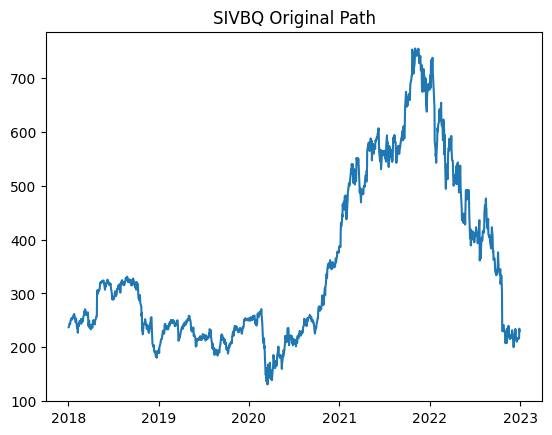

In [ ]:
plt.plot(df.Close)
plt.title(f'{ticker} Original Path')

Text(0.5, 1.0, 'SIVBQ -1X Leverage Path')

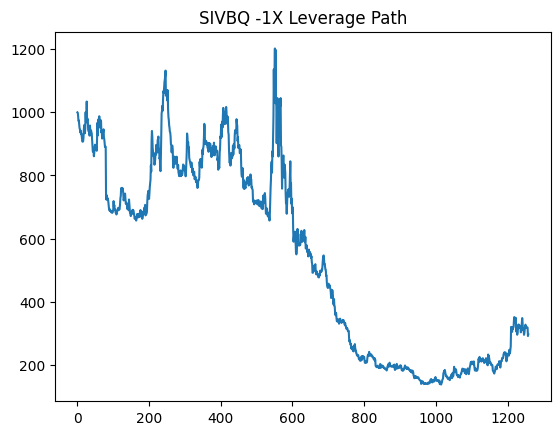

In [ ]:
plt.plot(leverage_path)
plt.title(f'{ticker} {leverage_rate}X Leverage Path')

In [ ]:
print(f"no leverage 수익률은 {(df.Close[-1] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[-1] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

no leverage 수익률은 -3.0499643374505108%, -1X 수익률은 -70.33680845793181% 입니다.


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([100, 101]*20)

df.columns = ['Close']
df

,Close
0,100
1,101
2,100
3,101
4,100
5,101
6,100
7,101
8,100
9,101


In [ ]:
df_chg = df.pct_change()
df_chg

,Close
0,NaN
1,0.010000
2,-0.009901
3,0.010000
4,-0.009901
5,0.010000
6,-0.009901
7,0.010000
8,-0.009901
9,0.010000


In [ ]:
close_chg = df_chg.Close.dropna()
close_chg

1     0.010000
2    -0.009901
3     0.010000
4    -0.009901
5     0.010000
6    -0.009901
7     0.010000
8    -0.009901
9     0.010000
10   -0.009901
11    0.010000
12   -0.009901
13    0.010000
14   -0.009901
15    0.010000
16   -0.009901
17    0.010000
18   -0.009901
19    0.010000
20   -0.009901
21    0.010000
22   -0.009901
23    0.010000
24   -0.009901
25    0.010000
26   -0.009901
27    0.010000
28   -0.009901
29    0.010000
30   -0.009901
31    0.010000
32   -0.009901
33    0.010000
34   -0.009901
35    0.010000
36   -0.009901
37    0.010000
38   -0.009901
39    0.010000
Name: Close, dtype: float64

In [ ]:
leverage_rate = -1

(close_chg*(leverage_rate))

1    -0.010000
2     0.009901
3    -0.010000
4     0.009901
5    -0.010000
6     0.009901
7    -0.010000
8     0.009901
9    -0.010000
10    0.009901
11   -0.010000
12    0.009901
13   -0.010000
14    0.009901
15   -0.010000
16    0.009901
17   -0.010000
18    0.009901
19   -0.010000
20    0.009901
21   -0.010000
22    0.009901
23   -0.010000
24    0.009901
25   -0.010000
26    0.009901
27   -0.010000
28    0.009901
29   -0.010000
30    0.009901
31   -0.010000
32    0.009901
33   -0.010000
34    0.009901
35   -0.010000
36    0.009901
37   -0.010000
38    0.009901
39   -0.010000
Name: Close, dtype: float64

In [ ]:
leverage_path = np.array([100 for i in range(len(df.Close)-1)]) * np.cumproduct((1+close_chg*(leverage_rate)))
leverage_path = np.append(100, leverage_path)

Text(0.5, 1.0, 'Original Path')

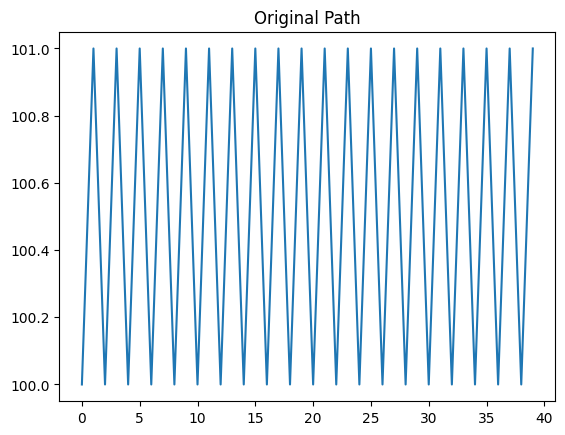

In [ ]:
plt.plot(df.Close)
plt.title("Original Path")

Text(0.5, 1.0, '-1X Path')

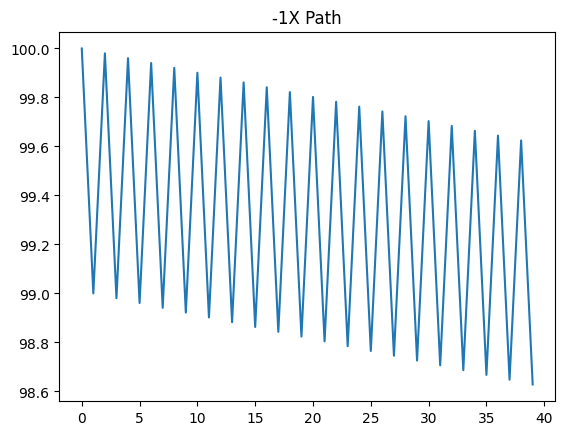

In [ ]:
plt.plot(leverage_path)
plt.title(f"{leverage_rate}X Path")

In [ ]:
print(f"no leverage 수익률은 {(list(df.Close)[-1] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[-1] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

no leverage 수익률은 1.0%, -1X 수익률은 -1.371812174539727% 입니다.


In [ ]:
df_chg*leverage_rate

In [ ]:
vol_drag = np.std(df_chg)

vol_drag = float(vol_drag)**2

vol_drag

In [ ]:
adj_chg = df_chg*leverage_rate + vol_drag

In [ ]:
adj_chg

In [ ]:
df = np.array([100 for i in range(len(adj_chg.Close))]) * np.cumproduct((1+adj_chg.Close))

In [ ]:
plt.plot(df)

In [ ]:
df_chg = pd.DataFrame([0.01, -0.01]*50)
df_chg.columns = ['Close']
df_chg

,Close
0,0.01
1,-0.01
2,0.01
3,-0.01
4,0.01
...,...
95,-0.01
96,0.01
97,-0.01
98,0.01


In [ ]:
df = np.array([100 for i in range(len(df_chg.Close))]) * np.cumproduct((1+df_chg.Close))

In [ ]:
print(df)

0     101.000000
1      99.990000
2     100.989900
3      99.980001
4     100.979801
         ...    
95     99.521126
96    100.516338
97     99.511174
98    100.506286
99     99.501223
Name: Close, Length: 100, dtype: float64


In [ ]:
leverage_rate = -1
leverage_path = np.array([100 for i in range(len(df))]) * np.cumproduct((1+df_chg.Close*(leverage_rate)))
leverage_path = np.append(100, leverage_path)

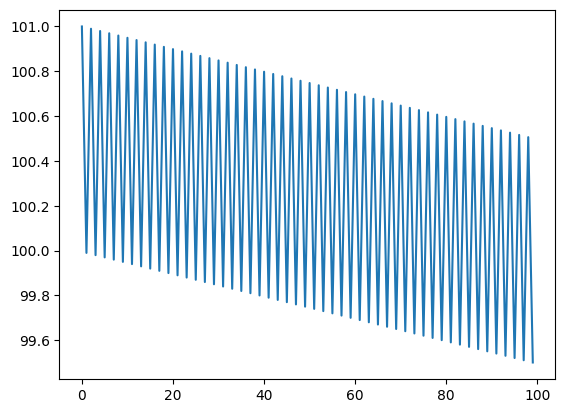

In [ ]:
plt.plot(df)

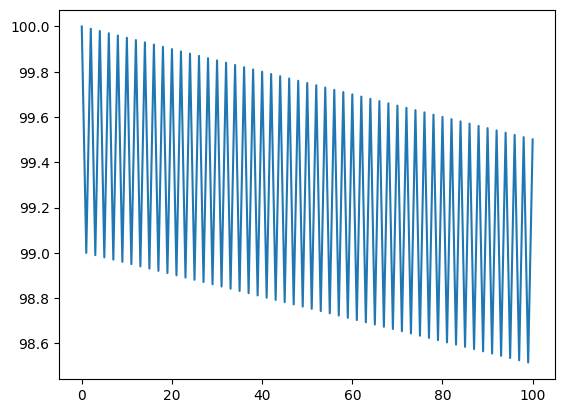

In [ ]:
plt.plot(leverage_path)

In [ ]:
vol_drag = np.std(df_chg)

vol_drag = float(vol_drag)**2/2

vol_drag

5e-05

In [ ]:
list(df)[-1]

99.5012230423009

In [ ]:
df_chg = df_chg + vol_drag

In [ ]:
df = np.array([100 for i in range(len(df_chg.Close))]) * np.cumproduct((1+df_chg.Close))

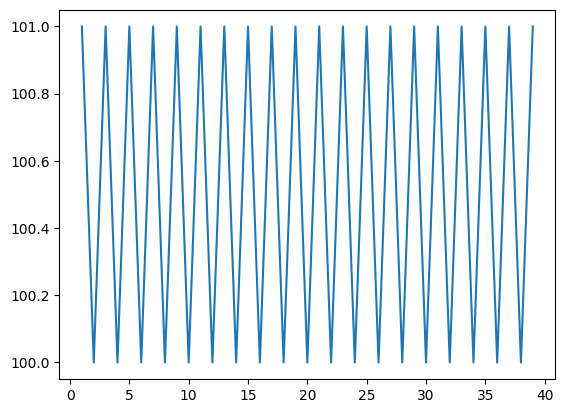

In [ ]:
plt.plot(df)

In [ ]:
leverage_rate = -1
leverage_path = np.array([100 for i in range(len(df))]) * np.cumproduct((1+df_chg.dropna().Close*(leverage_rate)))
leverage_path = np.append(100, leverage_path)

In [ ]:
print(leverage_path)

[100.          98.995       99.98000025  98.97520125  99.9600045
  98.95540645  99.94001275  98.93561562  99.920025    98.91582874
  99.90004124  98.89604583  99.88006148  98.87626686  99.86008572
  98.85649186  99.84011395  98.83672081  99.82014618  98.81695371
  99.8001824   98.79719057  99.78022261  98.77743138  99.76026682
  98.75767614  99.74031501  98.73792485  99.7203672   98.71817751
  99.70042338  98.69843412  99.68048354  98.67869468  99.66054769
  98.65895919  99.64061583  98.63922764  99.62068796  98.61950004
  99.60076407  98.59977639  99.58084417  98.58005668  99.56092825
  98.56034092  99.54101631  98.5406291   99.52110835  98.52092122
  99.50120438  98.50121728  99.48130439  98.48151728  99.46140838
  98.46182122  99.44151634  98.44212911  99.42162829  98.42244093
  99.40174421  98.40275668  99.38186411  98.38307638  99.36198799
  98.36340001  99.34211584  98.34372757  99.32224766  98.32405908
  99.30238346  98.30439451  99.28252323  98.28473388  99.26266698
  98.265077

In [ ]:
vol_drag = np.std(df_chg*(leverage_rate))

vol_drag = float(vol_drag)**2

vol_drag

0.0001

In [ ]:
lev_chg = df_chg.dropna().Close*(leverage_rate) + vol_drag

In [ ]:
df_chg.dropna().Close*(leverage_rate)

0    -0.01005
1     0.00995
2    -0.01005
3     0.00995
4    -0.01005
       ...   
95    0.00995
96   -0.01005
97    0.00995
98   -0.01005
99    0.00995
Name: Close, Length: 100, dtype: float64

In [ ]:
df = np.array([1000 for i in range(len(lev_chg))]) * np.cumproduct((1+lev_chg))

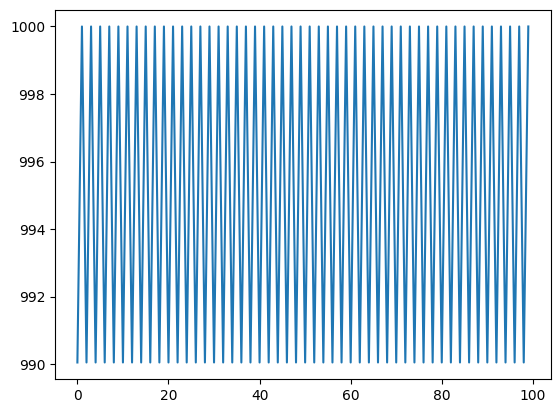

In [ ]:
plt.plot(df)